In [9]:
import matplotlib.pyplot as plt
import numpy as np

from superfv import AdvectionSolver
import superfv.initial_conditions as ic
import superfv.visualization as vis

In [ ]:
N = 32

sim = AdvectionSolver(
    ic=lambda idx, x, y, z, t, xp: ic.square(idx, x, y, z, vx=2, vy=1, xp=xp),
    nx=N,
    ny=N,
    p=1,
    MUSCL=True,
    MUSCL_limiter="minmod",
    flux_recipe=1,
    CFL=0.5,
)
sim.musclhancock(1.0)

Step #385 @ t=1.00e+00 | dt=5.77e-15 | (done)                                                       


In [11]:
np.min(sim.minisnapshots["min_rho"]), np.max(sim.minisnapshots["max_rho"])

(np.float64(0.0), np.float64(1.0))

/Users/jonathan/Desktop/superfv/superfv/visualization.py:32: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.492188
  warnings.warn(
/Users/jonathan/Desktop/superfv/superfv/visualization.py:32: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.492188
  warnings.warn(


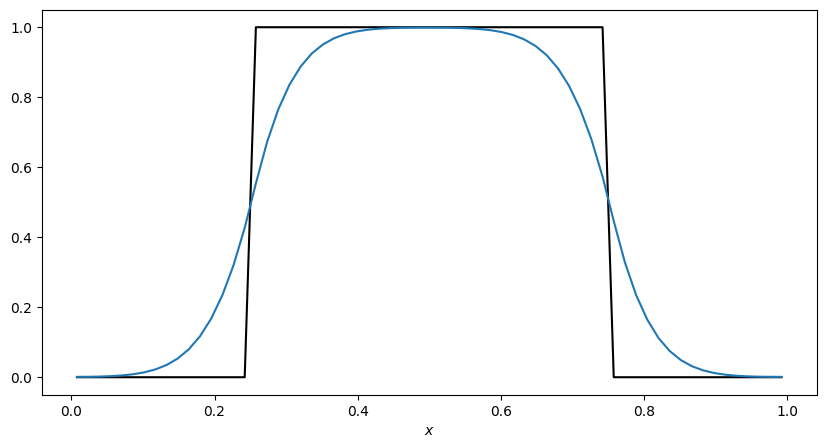

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
vis.plot_1d_slice(sim, ax, "rho", cell_averaged=True, y=0.5, t=0, color="k")
vis.plot_1d_slice(sim, ax, "rho", cell_averaged=True, y=0.5, xlabel=True)